In [1]:
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# If you use google colab, run this command, We write this command beacuse of the
# cv2.imshow() dose not work when we use google colab
from google.colab.patches import cv2_imshow

In [4]:
#Loading this module. It contains a set of images used for experimenting purposes
#The coins dataset is already in grayscale
from skimage.data import coins, astronaut

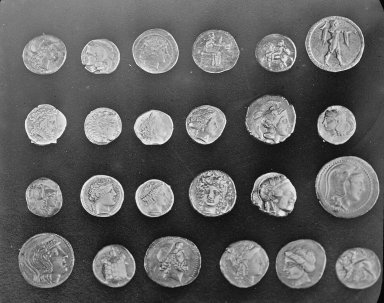

In [5]:
coins_image = coins()
cv2_imshow(coins_image)


###As we can see, the image is already in grayscale format

In [6]:
import numpy as np

In [7]:
  """
    Filters the given image using any filter like sharpning, smoothing, and edge detection.

    Args:
        image (numpy array): The input image.
        kernel (numpy array): The filter kernel.

    Returns:
        (numpy array) filtered_img - the image after applying the filter
    """
def apply_filter(image, kernel):
    rows, columns = image.shape

    kr, kl = kernel.shape

    pad_image=np.pad(image,((1,),(1,)),'symmetric')

    filtered_img = np.zeros((rows, columns))  # Output image

    # Convolution operation
    for i in range(rows):
        for j in range(columns):
            region = pad_image[i:i+kr, j:j+kl]  # Extracting sub-region
            filtered_img[i, j] = np.sum(region * kernel)  # Convolution

    return filtered_img

#Sobel filter (Edge Detection)

In [8]:
# Define Sobel Kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [9]:
# Apply Sobel filters
G_x = apply_filter(coins_image, sobel_x)
G_y = apply_filter(coins_image, sobel_y)

#### After calculating the G_x and G_y we want to compute the Gradient Magnitude using the following formula:
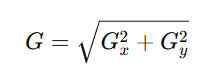

In [10]:
coins_sobel_filtered = np.sqrt(G_x**2 + G_y**2)

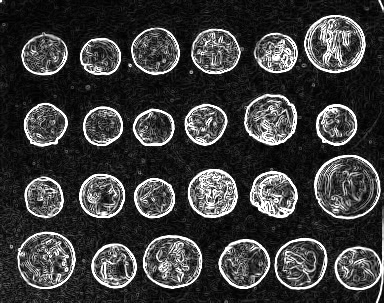

In [11]:
#Display the coins image after applying the Sobel filter
cv2_imshow(coins_sobel_filtered)

### As we can see, the coin's edges appear after applying the Sobel filter. This is an example of edge detection filter

#Gaussian filter (smoothing filter)

In [12]:
#3×3 Gaussian filter
gaussian_kernal = np.array([[1, 2, 1],
                        [2, 4, 2],
                        [1, 2, 1]],dtype=np.float32) / 16


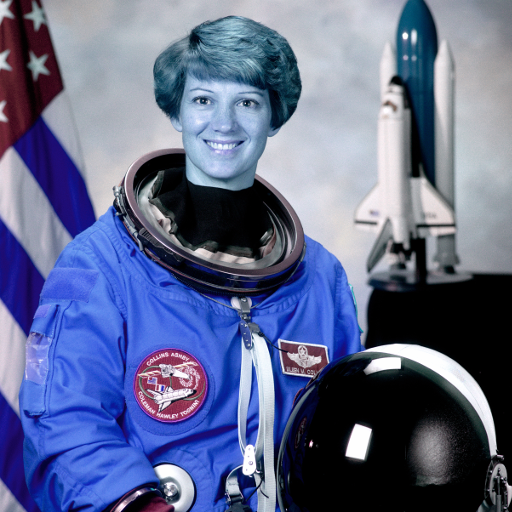

In [13]:
astronaut_image = astronaut()
cv2_imshow(astronaut_image)

###Since the astronaut image is RGB, we should convert it to grayscale.

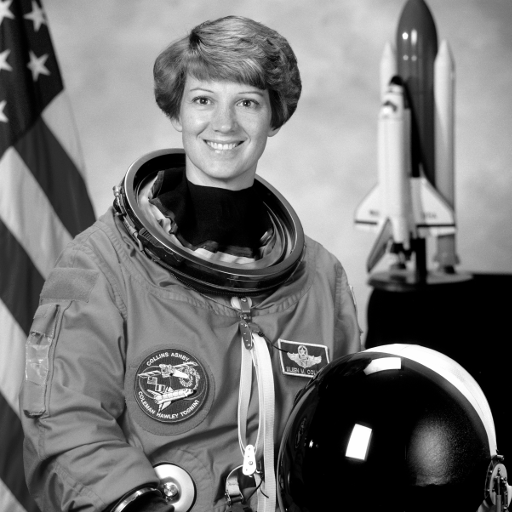

In [14]:
astronaut_image = cv2.cvtColor(astronaut_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(astronaut_image)

In [15]:
#Apply Gaussian filter
gaussian_filtered = apply_filter(astronaut_image, gaussian_kernal)

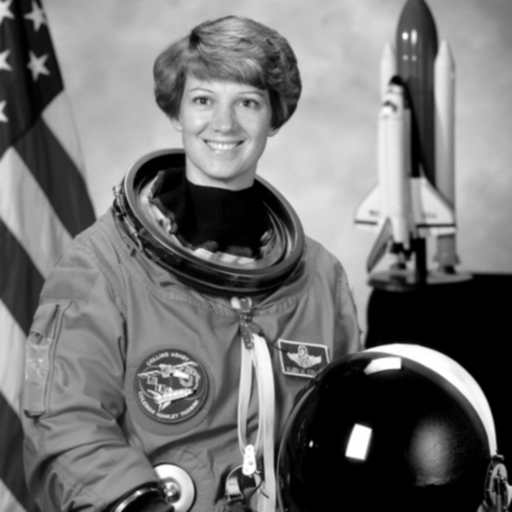

In [16]:
#Display the astronaut image image after applying the Sobel filter
cv2_imshow(gaussian_filtered)

###After applying the Gaussian filter, the image became a little blurred

#High-Boost filter (Sharpening filter)
####The formula of the High-Boost filter is:
*`High-Boost-Image=Original+(A−1)×(Original−Blurred)`*
#### Where A represents the **Sharpening Strength**, we assigned it 2 because we want stronger sharpening


In [17]:
#Apply High-Boost filter

# Step 1: compute the blurred (Gaussian filter)
# We have already computed it for the astronaut image.
blurred = gaussian_filtered

In [18]:
# step 2: Apply High-Boost filter
high_boost_image = astronaut_image + (2-1) * (astronaut_image - blurred)

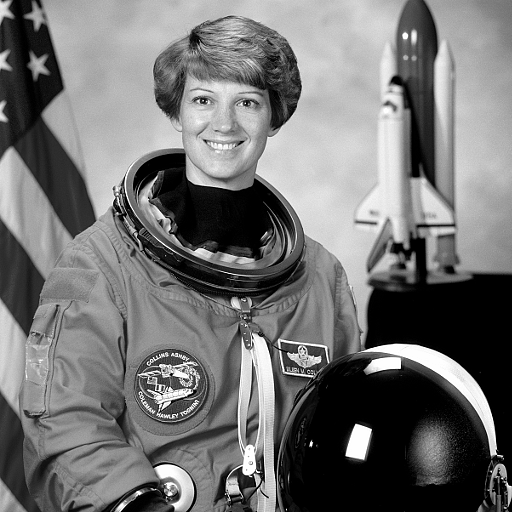

In [19]:
cv2_imshow(high_boost_image)

##High-Boost image ⬆

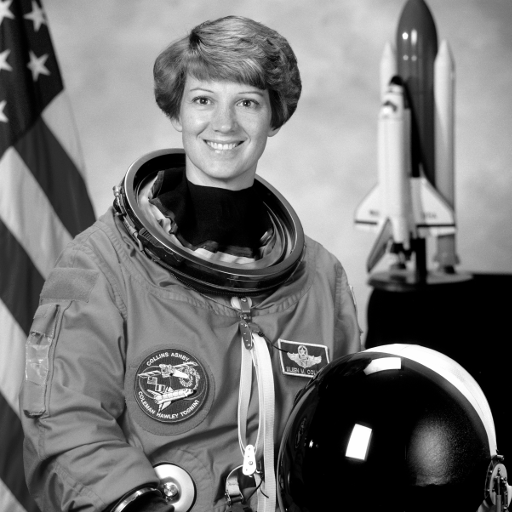

In [20]:
cv2_imshow(astronaut_image)

##The original image ⬆

###As we can see after applying the filter, it became a little clearer in comparison with the original image.